## Lead Score - Case Study

Problem Statement : 

-- An education company named X Education sells online courses to industry professionals.
-- Company faces the challenge of poor Lead Conversion rate as it gets a lot of leads on website, but very few conversions. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
-- To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
-- If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

Business Objective: 

-- Company wants to know most promising leads.
-- For that they want to build a Model which identifies the hot leads.
-- Deployment of the model for the future use.


### I. Loading and cleaning the data

In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# supress Wrnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data

leads = pd.read_csv(r"C:\Users\Daksha\Desktop\MS in DS Jupyter notebooks\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspecting various aspects of Dataframe

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Data Cleaning 

In [7]:
# converting all the values to lower case

leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# replacing 'Select' with NaN (As it means no option is selected)

leads = leads.replace('select',np.nan)

In [9]:
# checking columns with one unique value since it won't affect our analysis

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# dropping unique valued columns

leads = leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

##### Handeling Missing Values

In [11]:
# checking percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# deleting columns having more than 45% of missing values

leads = leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','Tags','How did you hear about X Education','City','Lead Number'],axis=1)

In [13]:
# again checking percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### We have 4 columns with high percentage of NULL values, however, since these columns are important, deleting them will impact our analysis. So lets replace the null values with NaN.

In [14]:
# replacing the null values with NaN, in columns where percentage of null values is less than 45%.

leads['Specialization'] = leads['Specialization'].fillna('not provided') 
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not provided')
leads['Country'] = leads['Country'].fillna('not provided')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')


In [15]:
# rechecking the percentage of Null values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [16]:
# checking the percent of loss if we remove null values

round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

1.48

**We will loose 1.48% data if we remove rows with null values.**

In [17]:
leads = leads[leads.isnull().sum(axis=1) <1]

In [18]:
# rechecking the percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

Percentage of missing values is 0% for all columns, so we are good to proceed with Univariate and Bivariate Analysis

In [19]:
# also, removing Id values as it is unique

leads = leads.drop('Prospect ID',1)
leads.shape

(9074, 21)

### II. EXPLORATORY DATA ANALYSIS

#### Univariate Analysis of Categorical Variables 

In [20]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

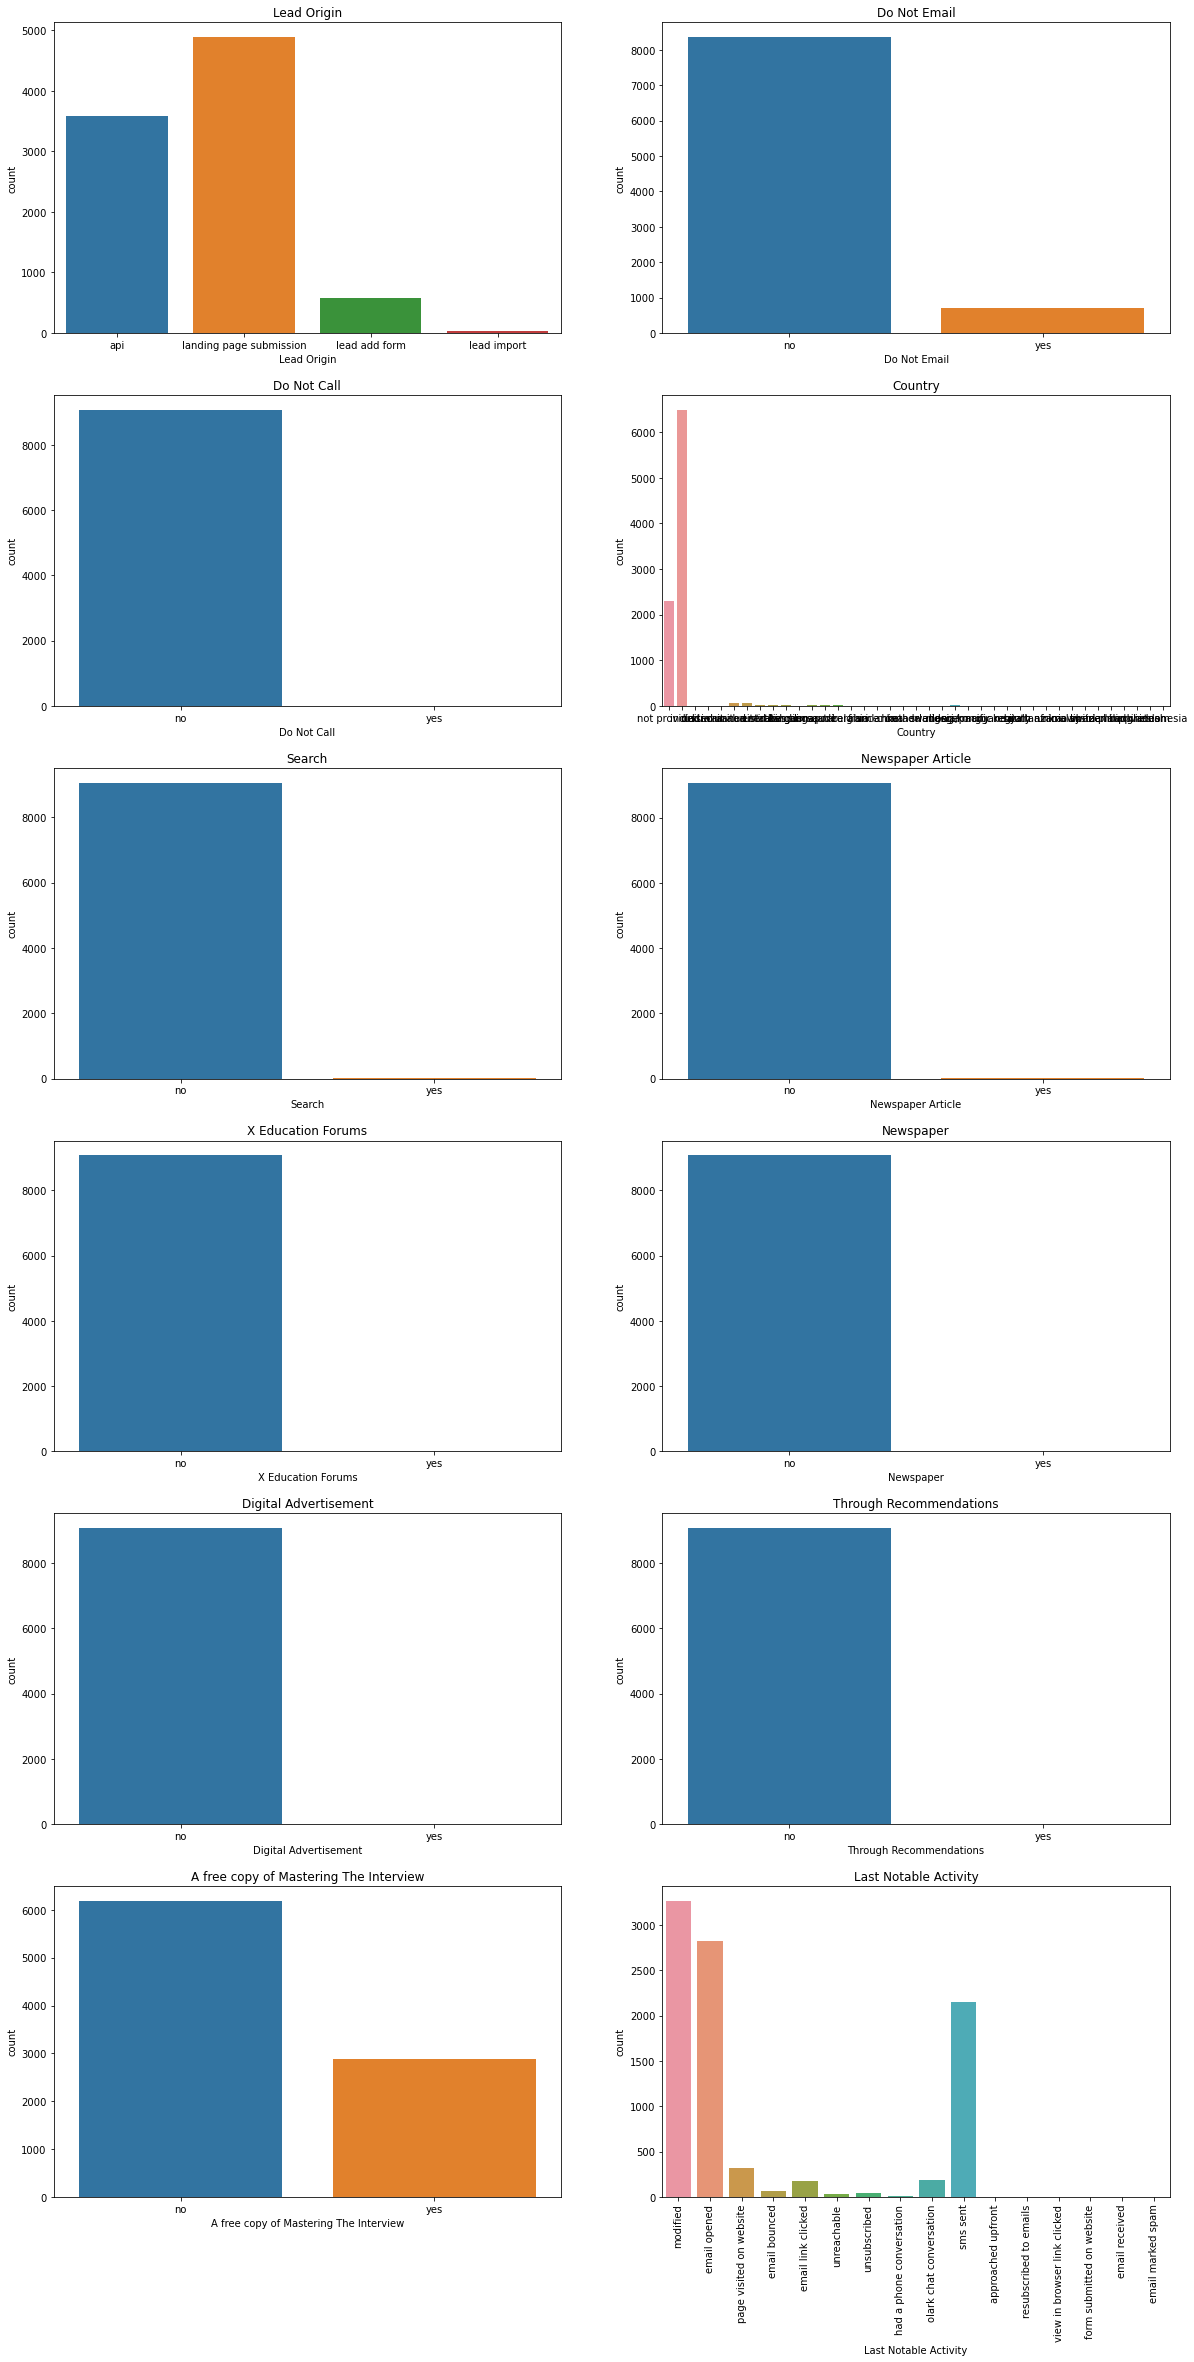

In [21]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

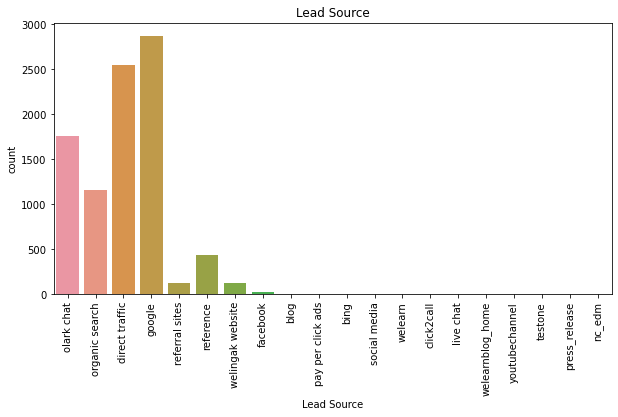

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

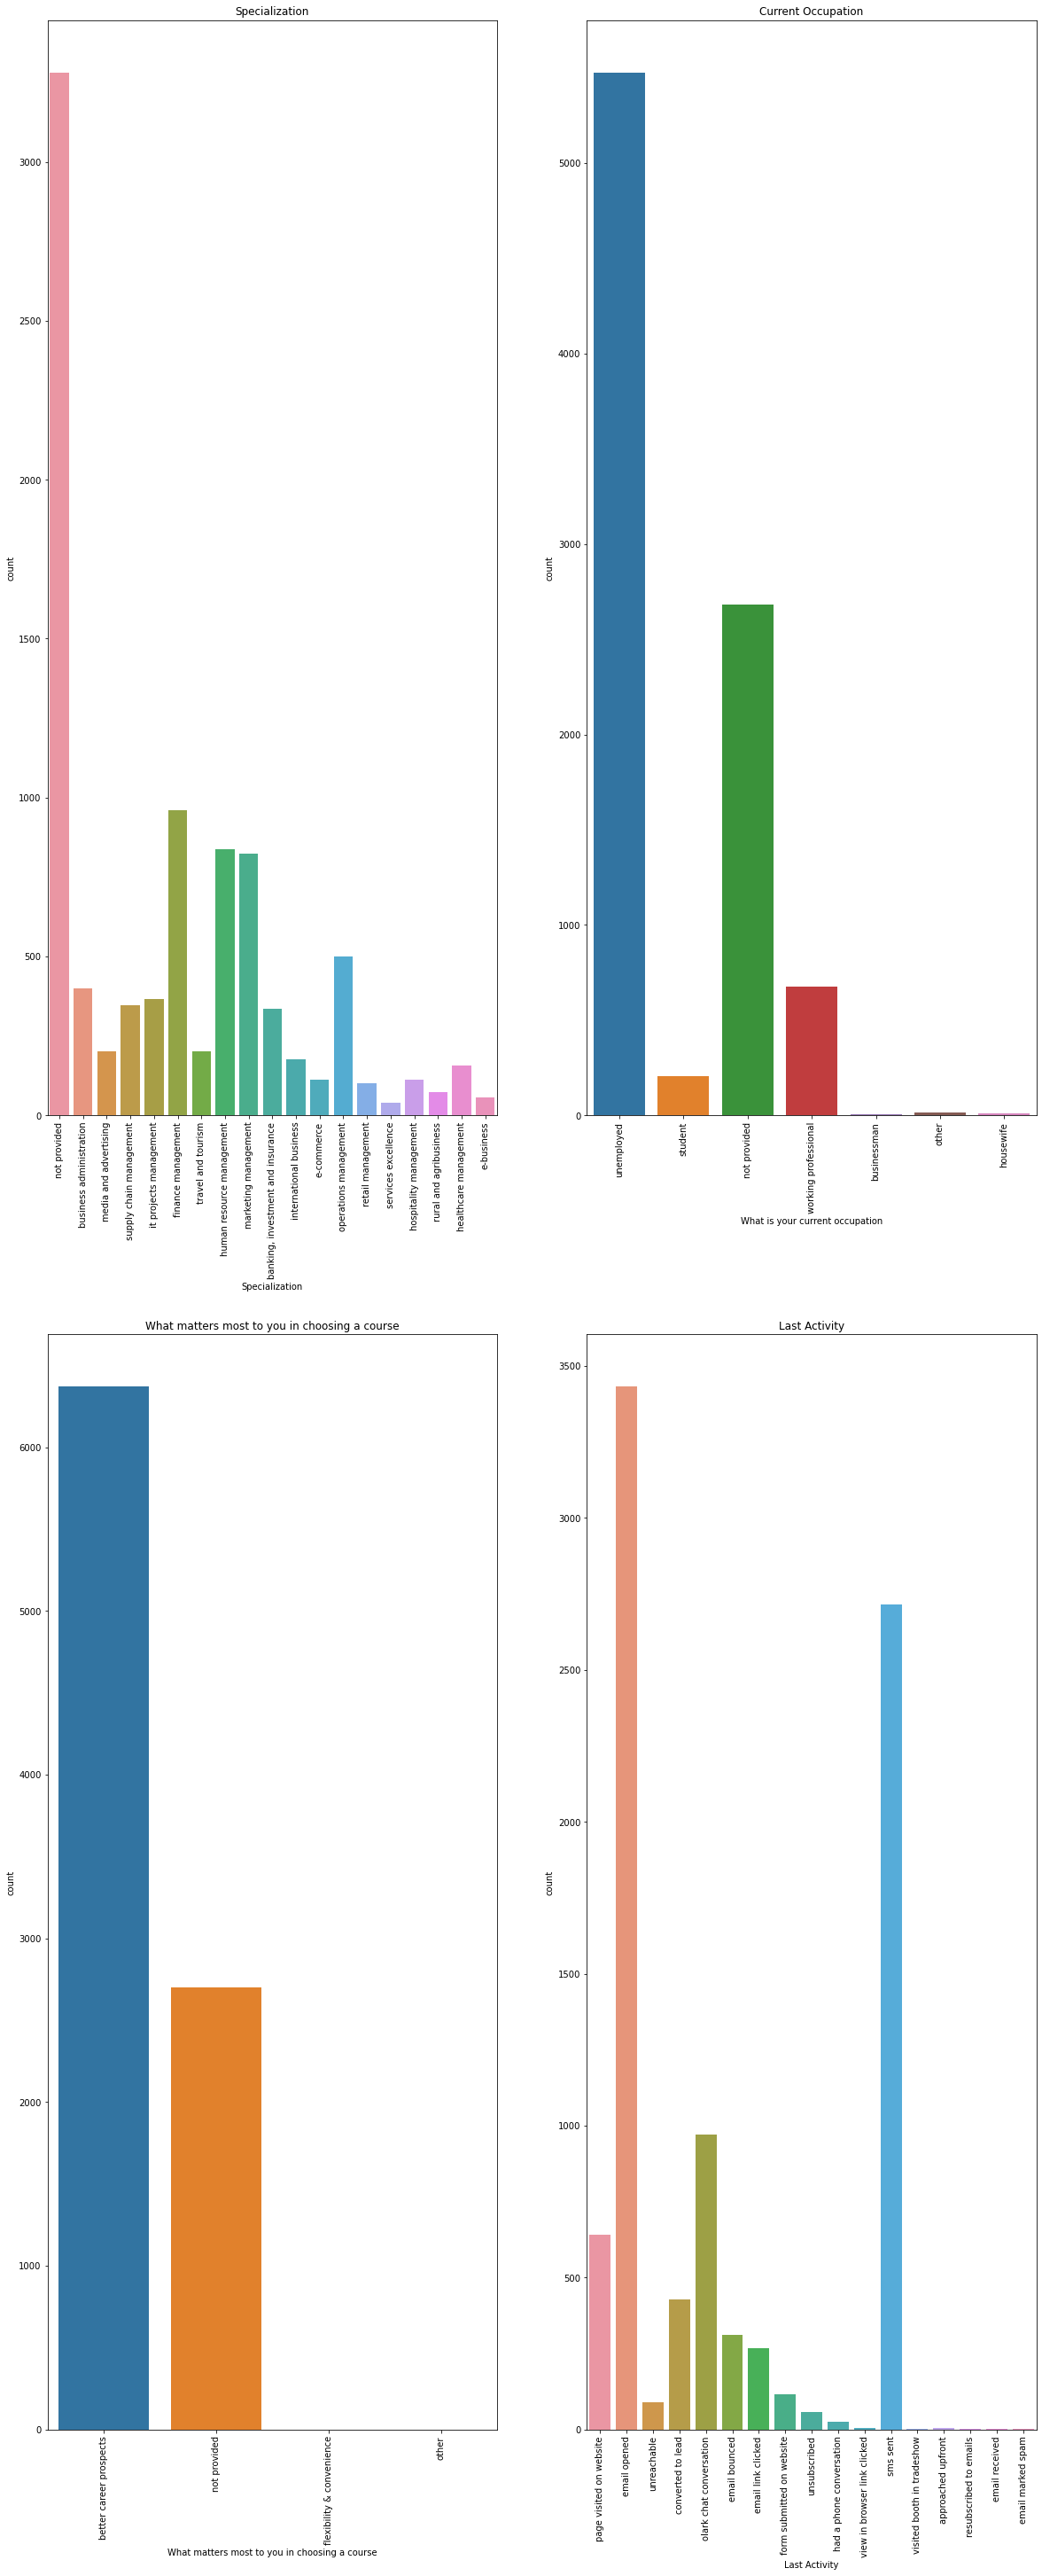

In [23]:
plt.figure(figsize = (20,50))
plt.subplot(2,2,1)
sns.countplot(leads['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(leads['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(leads['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(leads['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

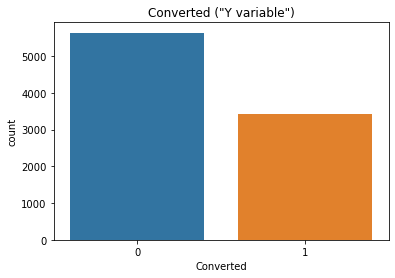

In [24]:
sns.countplot(leads['Converted'])
plt.title('Converted ("Y variable")')
plt.show()

#### Univariate Analysis of Numerical Variables 

In [25]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

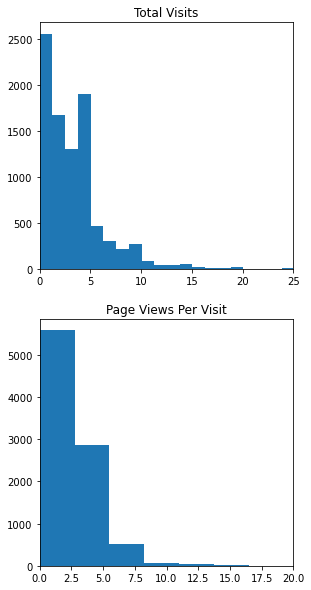

Text(0.5, 1.0, 'Total Time Spent on Website')

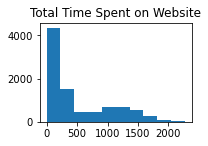

In [26]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

#### Let us now relate all Categorical Variables to "Converted"

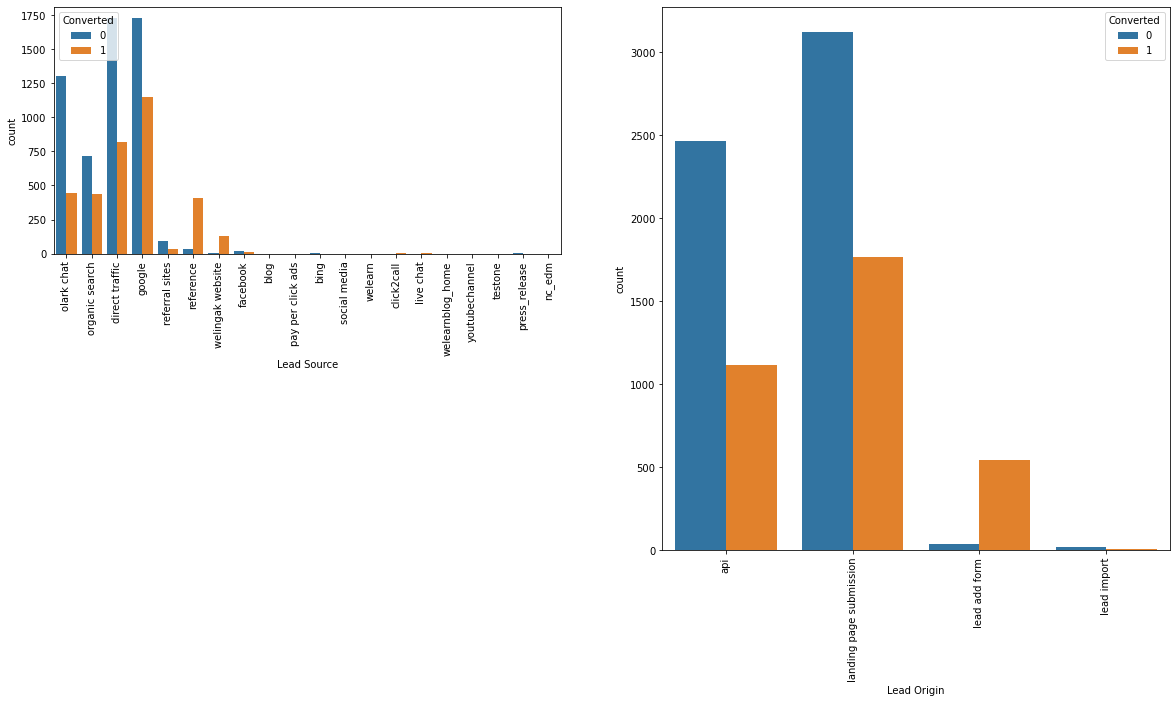

In [27]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

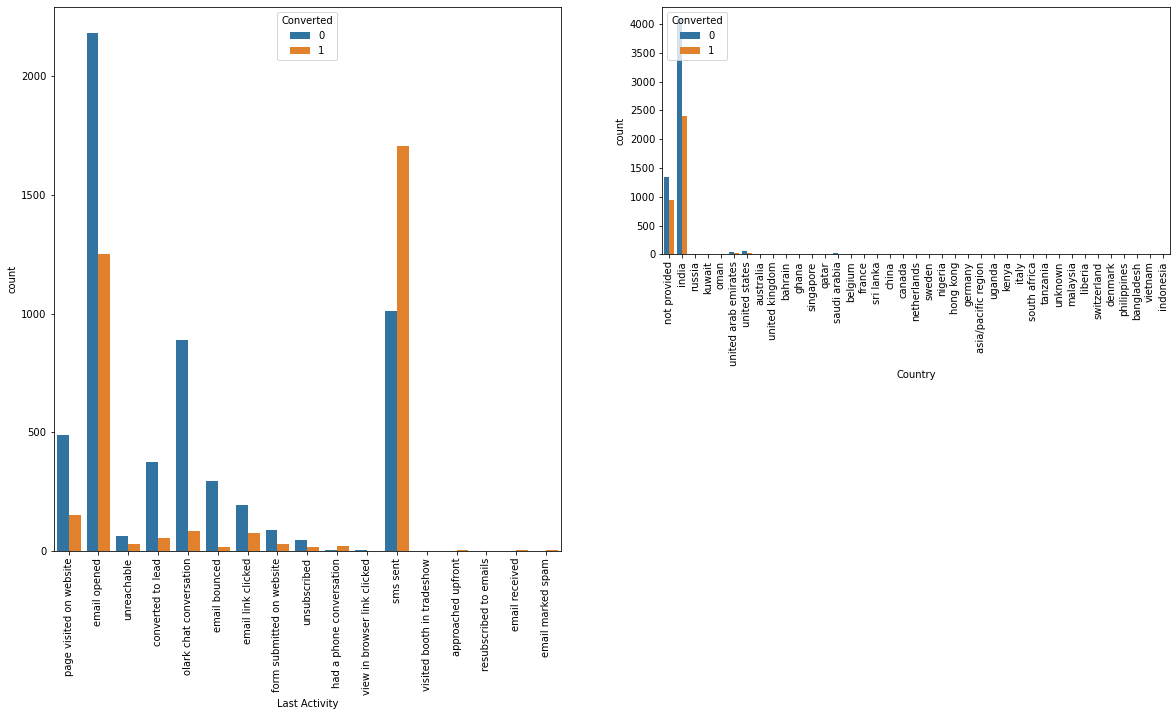

In [28]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x='Country', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

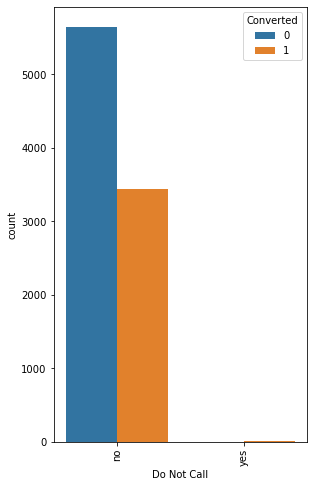

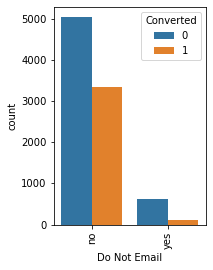

In [29]:
plt.figure(figsize = (10,8))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.show()

plt.subplot(1,2,2)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

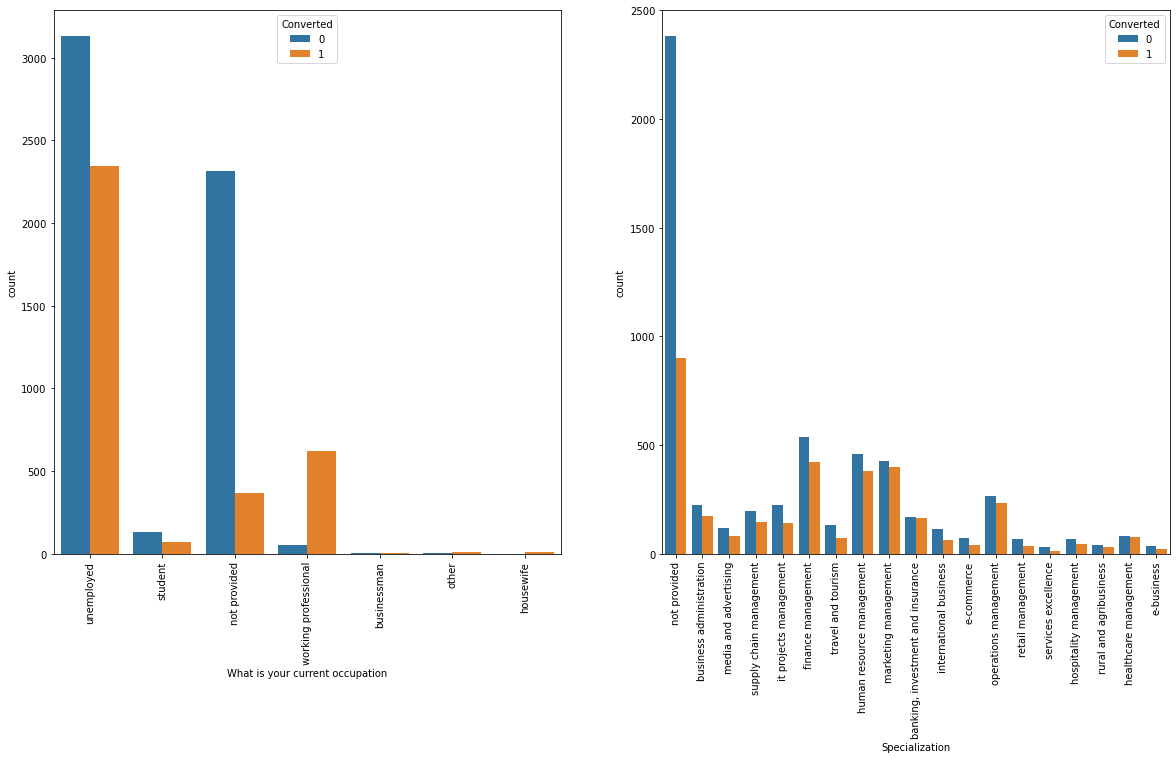

In [30]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

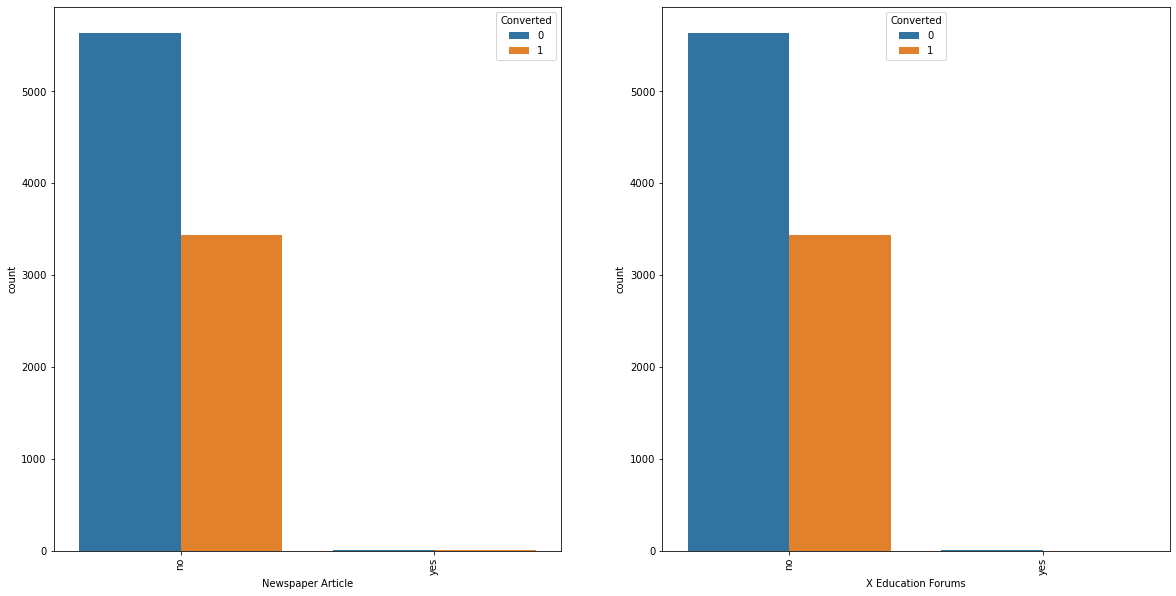

In [31]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

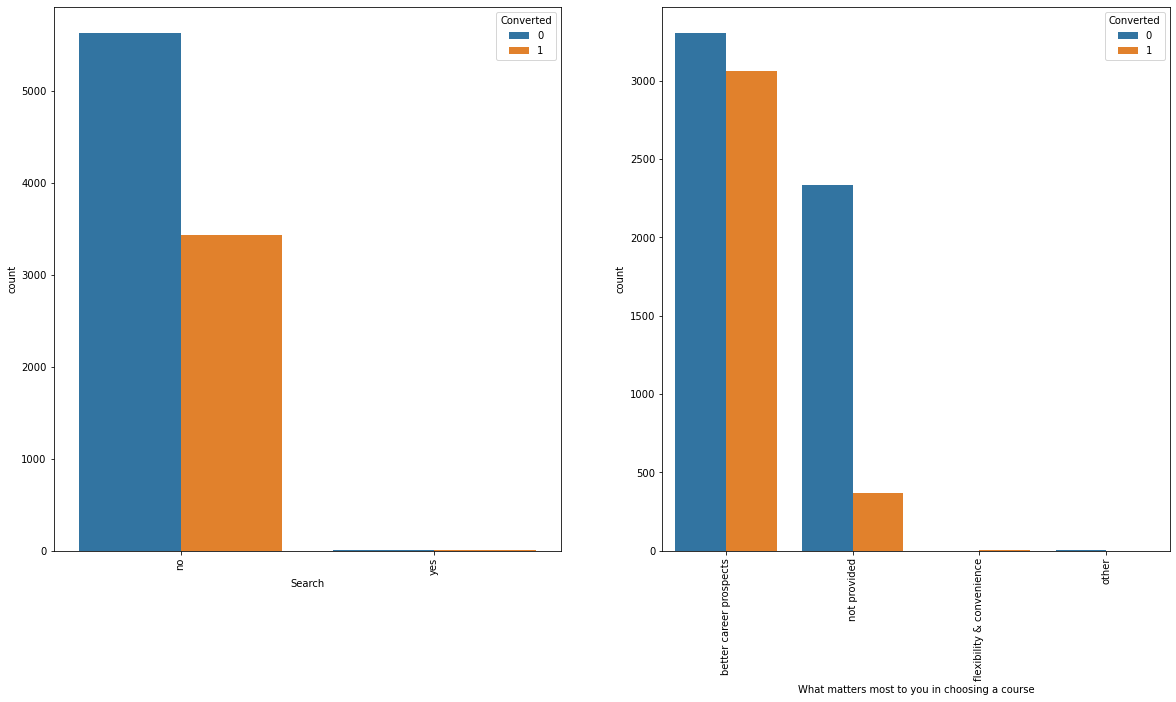

In [32]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

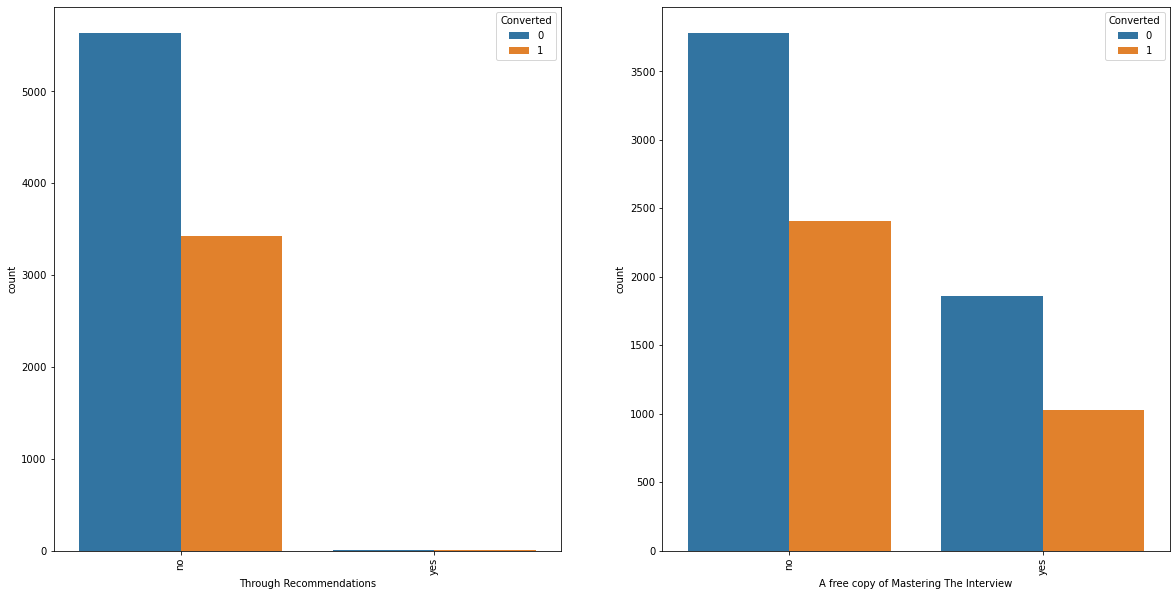

In [33]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)


plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

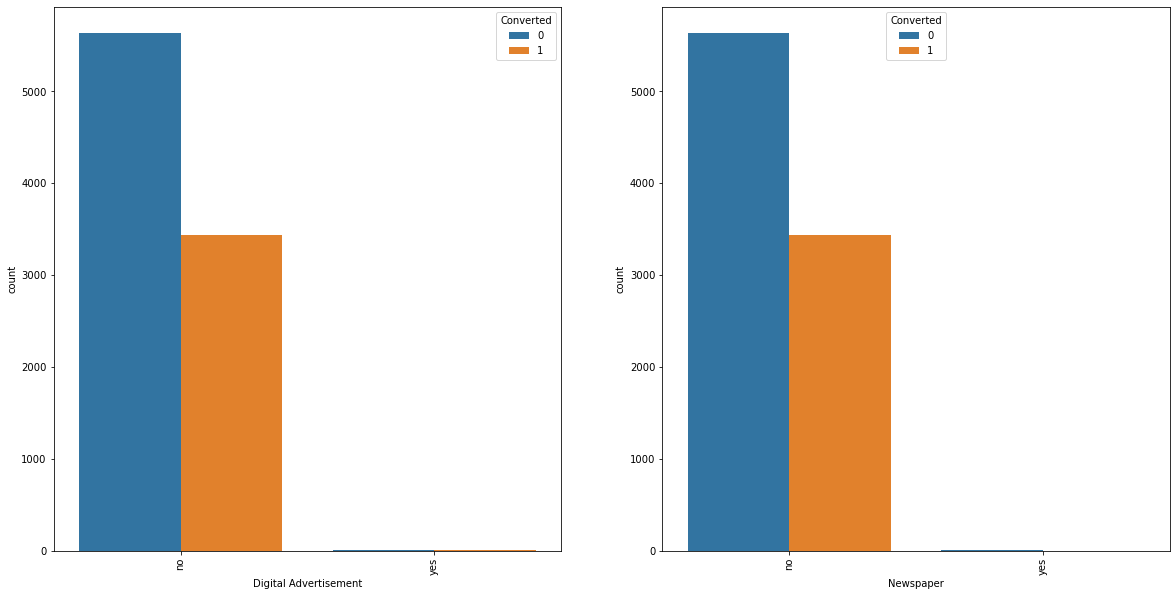

In [34]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

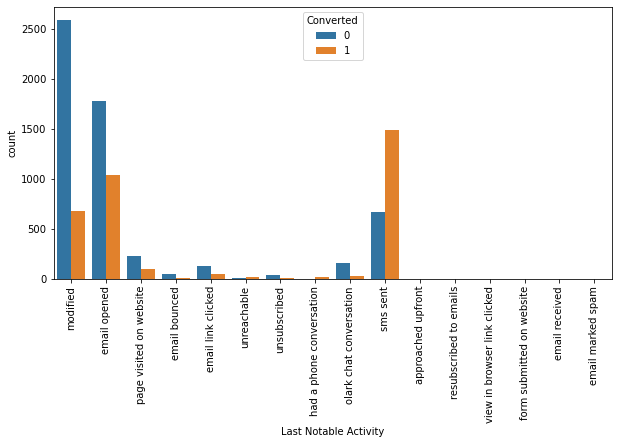

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)

plt.show()

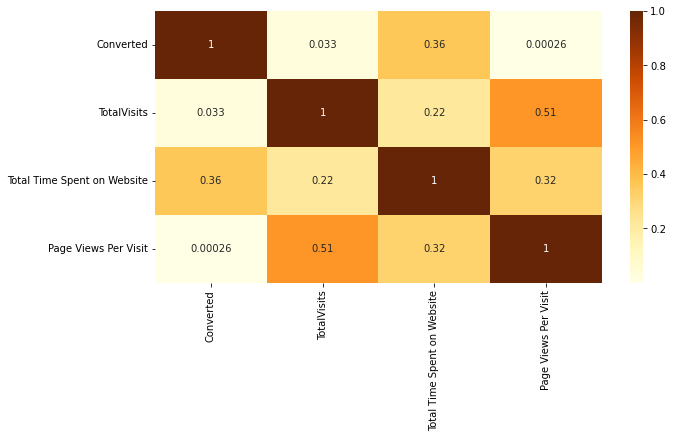

In [36]:
# let us check the relationship between various variables via heatmap

plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(), annot=True, cmap="YlOrBr")

plt.show()

**Observation :**
The above mentioned EDA makes it evident that many elements contain only a little amount of data and as a result will be of less significance to our analysis.

In [37]:
num = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


**As we can encounter here that there are no significant outliers, therefore we can proceed with the analysis part.**

### III. Dummy Variables

In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [39]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# let us now use "get_dummies" to create dummy variables

dummy = pd.get_dummies(leads[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# adding the results to the master df

leads_dummy = pd.concat([leads, dummy], axis=1)
leads_dummy.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# determining the proportion of null values in each column

round(100*(leads_dummy.isnull().sum()/len(leads_dummy.index)), 2)

Lead Origin                                           0.0
Lead Source                                           0.0
Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
                                                     ... 
Last Notable Activity_resubscribed to emails          0.0
Last Notable Activity_sms sent                        0.0
Last Notable Activity_unreachable                     0.0
Last Notable Activity_unsubscribed                    0.0
Last Notable Activity_view in browser link clicked    0.0
Length: 100, dtype: float64

In [42]:
# few coulums needs to be drpoped

leads_dummy = leads_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### IV. Test-Train Split

In [43]:
# importing library

from sklearn.model_selection import train_test_split

In [44]:
X = leads_dummy.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# putting "y" in the target variable

y = leads_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# let us now split the dataset 70% - train and 30% - test ration

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [47]:
# importing MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [48]:
# scaling the three numeric features

sc = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = sc.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


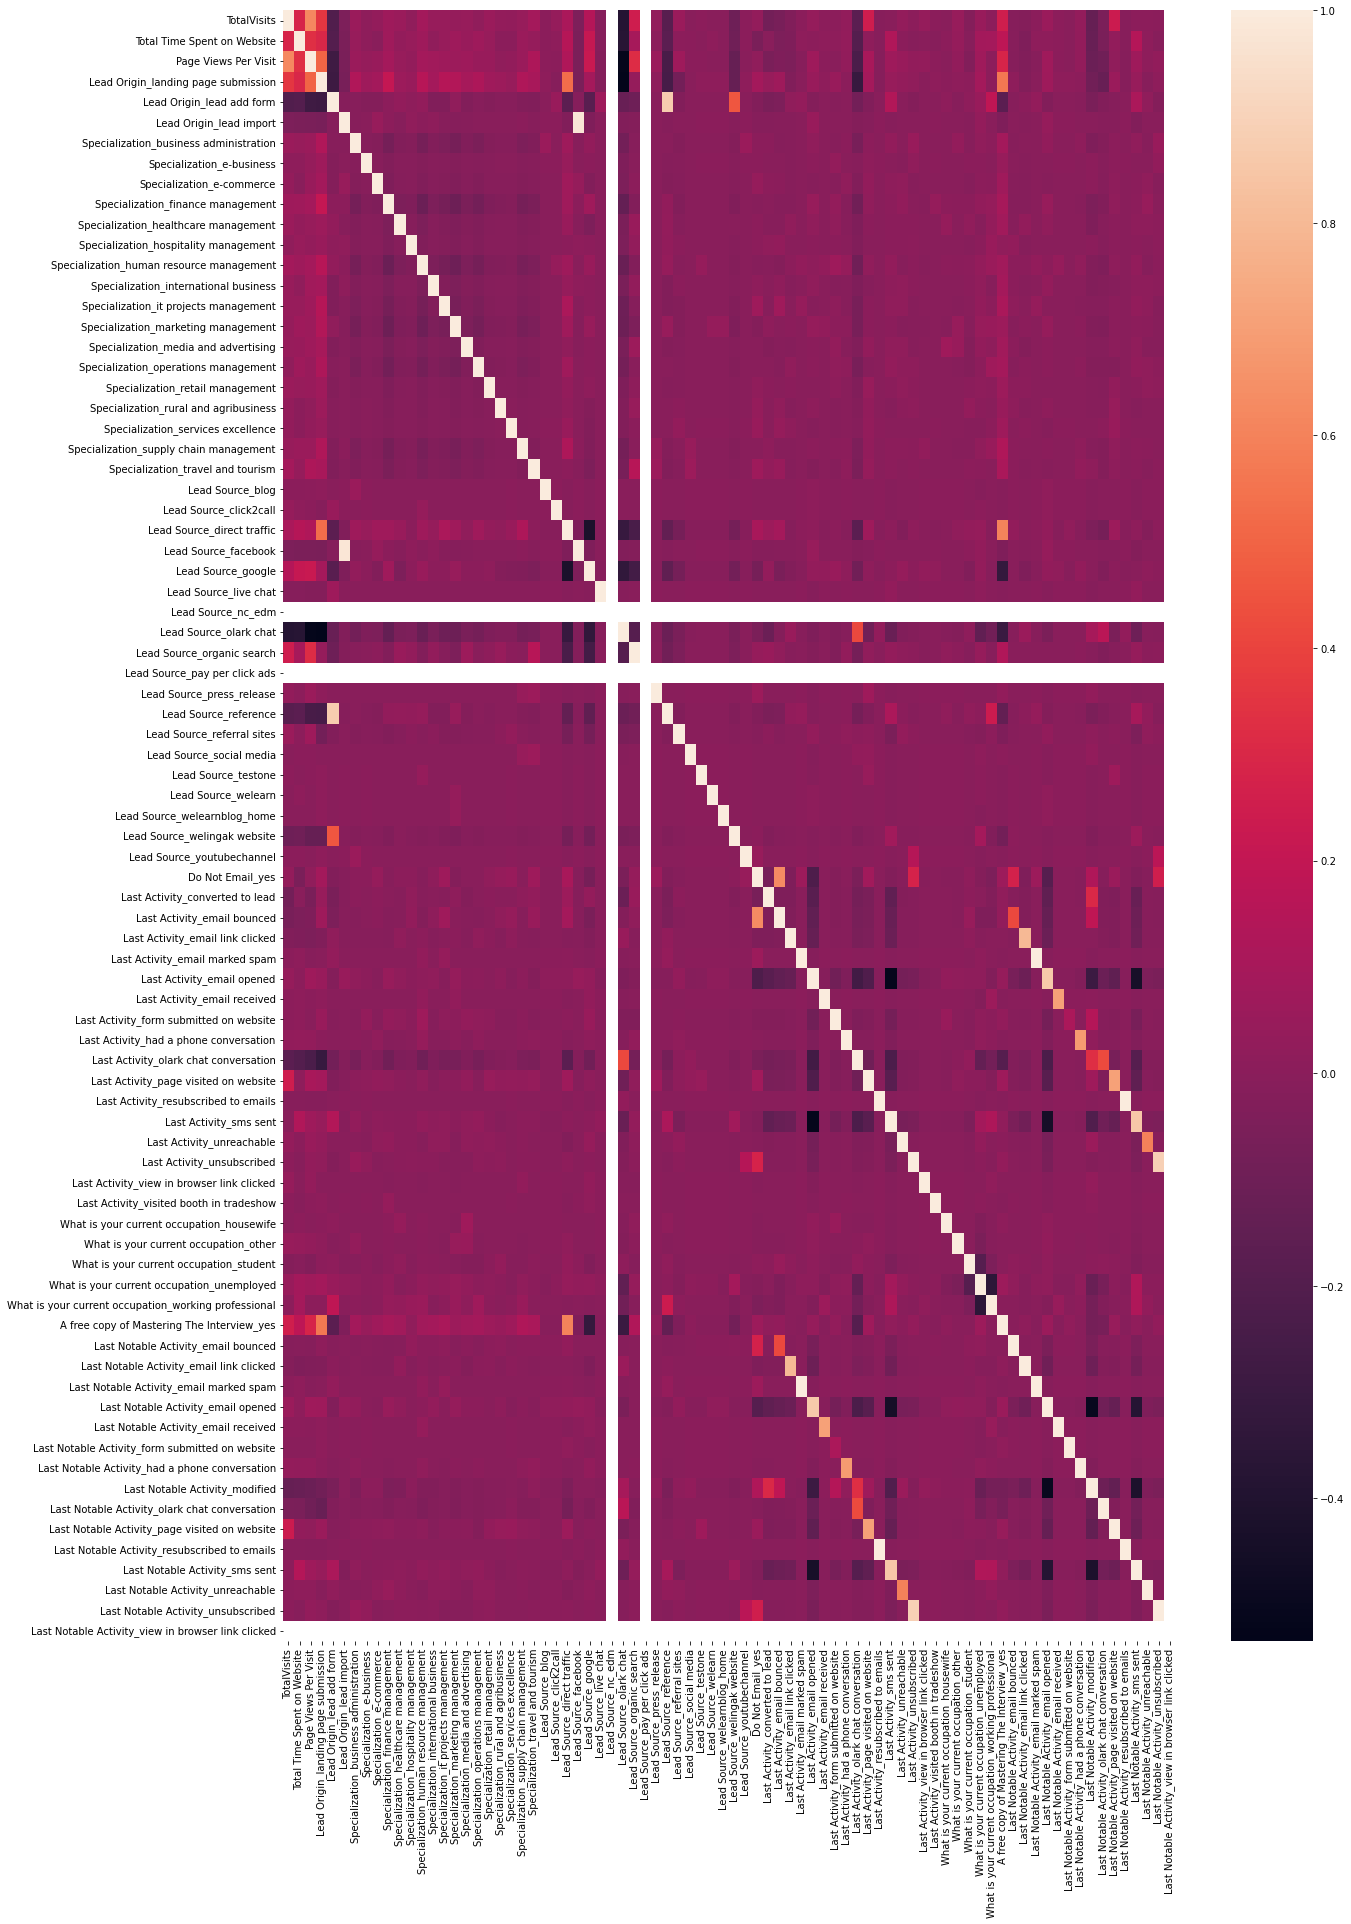

In [49]:
# checking the relationship between various variables

plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

**As we can observe here that we need to tackle with a lot of varaibles, we could eliminate them after the RFE.**

### V. Model Building

**As mentioned in the guide we need to use "Logistic Regression" to build our model.**

In [50]:
# importing 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [51]:
# importing RFE

from sklearn.feature_selection import RFE

In [52]:
# running RFE with 15 variables as output

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [53]:
# RFE-selected characteristics

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [54]:
# placing all of the RFE columns in the variable "col"

col = X_train.columns[rfe.support_]

In [55]:
# selecting the columns RFE has chosen

X_train = X_train[col]

In [56]:
# importing statsmodels

import statsmodels.api as sm

In [57]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Tue, 18 Oct 2022   Deviance:                       5270.1
Time:                        07:40:54   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [58]:
# importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# creating a VIF with all the variables available in the dataframe

v = pd.DataFrame()
v['Features'] = X_train.columns
v['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
v['VIF'] = round(v['VIF'], 2)
v = v.sort_values(by = "VIF", ascending = False)
v

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


**As we can observe here, the VIF value for the variables is less than 2.5 which is good enough for the next step of model prediction. However, the p-value for the variables has to be less than 0.05. Let us now elimiante all those varaibles having higher values.**

In [60]:
X_train.drop(['What is your current occupation_housewife', 'What is your current occupation_other', 'Last Notable Activity_had a phone conversation'], axis = 1, inplace = True)

In [61]:
# installing the new features on the model

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.8
Date:                Tue, 18 Oct 2022   Deviance:                       5311.7
Time:                        07:40:54   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4345      0.113    -30.511      0.000      -3.655      -3.214
TotalVisits                                              5.7276      1.459      3.926      0.000       2.868       8.587
Total Time Spent on Website                              4.6142      0.166     27.753      0.000       4.288       4.940
Lead Origin_lead add form                                3.7570      0.225     16.676      0.000       3.315       4.199
Lead Source_olark chat                                   1.5780      0.111     14.159      0.000       1.360       1.796
Lead Source_welingak website                             2.5828      1.033      2.501      0.012       0.558       4.607
Do Not Email_yes                                        -1.4412      0.170     -8.470      0.000      -1.775      -1.108
Last Activity_olark chat conversation                   -1.3929      0.167     -8.330      0.000      -1.721      -1.065
Last Activity_sms sent                                   1.2616      0.074     17.108      0.000       1.117       1.406
What is your current occupation_student                  1.2218      0.226      5.401      0.000       0.778       1.665
What is your current occupation_unemployed               1.1394      0.085     13.408      0.000       0.973       1.306
What is your current occupation_working professional     3.6555      0.204     17.914      0.000       3.256       4.055
Last Notable Activity_unreachable                        1.8066      0.601      3.008      0.003       0.629       2.984
========================================================================================================================
"""

In [62]:
# recreating a VIF with all the variables available in the dataframe

v = pd.DataFrame()
v['Features'] = X_train.columns
v['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
v['VIF'] = round(v['VIF'], 2)
v = v.sort_values(by = "VIF", ascending = False)
v

,Features,VIF
9,What is your current occupation_unemployed,2.29
1,Total Time Spent on Website,2.06
0,TotalVisits,1.84
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
10,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


### VI. Model Prediction

In [63]:
# computing the train set's probability distribution

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.648651
3604    0.135107
5584    0.238085
7679    0.135107
7563    0.495064
7978    0.778219
7780    0.169048
7863    0.982785
838     0.772810
708     0.149226
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64865119, 0.135107  , 0.23808524, 0.135107  , 0.49506379,
       0.77821892, 0.16904797, 0.98278528, 0.77281013, 0.14922632])

In [65]:
# dataframe with the rate of conversion and probablity of predicted one's

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.648651
1,0,0.135107
2,0,0.238085
3,0,0.135107
4,0,0.495064


In [66]:
# replacing 0 or 1 with the cutoff as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.648651,1
1,0,0.135107,0
2,0,0.238085,0
3,0,0.135107,0
4,0,0.495064,0


### VII. Model Evaluation

In [67]:
# importing sklearn metrics for evaluation

from sklearn import metrics

In [68]:
# establishing confusion matrix

confus = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confus

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

In [69]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [70]:
# checing the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

**We have an accuracy of almost 81% which is indeed a very good value.**

In [71]:
# computing the value of true positive
TP = confus[1,1]

# computing the value of true negatives
TN = confus[0,0]

# computing the value of false positives
FP = confus[0,1] 

# computing the value of false negatives
FN = confus[1,0]

In [72]:
# computing the specificity

TN/(TN+FP)

0.8826700898587934

In [73]:
# computing the sensitivity

TP/(TP+FN)

0.6954397394136808

**As we can compute here, the value of sensitivity is about 70% and specificity is 87% with a cutoff of 0.5. We can now move on to the next step.**

### VII. ROC Curve

**The previous cutoff was chosen at random. We need to find the best one for predicting the model.**

In [74]:
# ROC function

def find_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

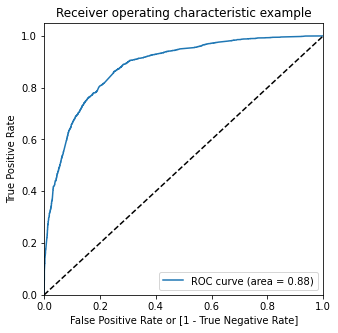

In [76]:
# calling the ROC function

find_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**As we can observe here, the area under ROC curve is 0.87 which is a pretty good value.**

In [77]:
# let us now create columns with various probability cutoffs

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0


In [78]:
# making a dataframe to see the accuracy, sensitivity, and specificity values at various cutoffs for probability
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# creating confusion matrix to determine sensitivity, accuracy, and specificity values for each level of probability

from sklearn.metrics import confusion_matrix
number = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in number:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    acc = (cm1[0,0]+cm1[1,1])/total1
    
    spe = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sen = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,acc,sen,spe]
cutoff

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577547,0.983713,0.321438
0.2,0.2,0.758463,0.913681,0.660591
0.3,0.3,0.788380,0.872557,0.735302
0.4,0.4,0.809321,0.764658,0.837484
0.5,0.5,0.810266,0.695440,0.882670
0.6,0.6,0.802551,0.627443,0.912965
0.7,0.7,0.772792,0.501629,0.943774
0.8,0.8,0.753110,0.413274,0.967394
0.9,0.9,0.706345,0.259772,0.987933


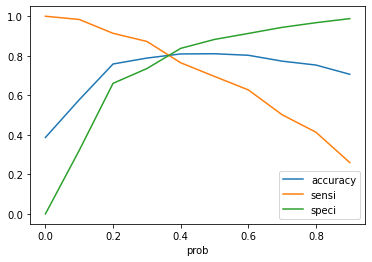

In [79]:
# let us plot all these three

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the above graph, we could make out that the point of optimal cut off is somewhere at 0.35**

In [80]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [81]:
# verifying the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [82]:
# establishing confusion matrix

confus2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confus2

array([[3126,  769],
       [ 481, 1975]], dtype=int64)

In [83]:
# computing the value of true positive
TP = confus2[1,1]

# computing the value of true negatives
TN = confus2[0,0]

# computing the value of false positives
FP = confus2[0,1] 

# computing the value of false negatives
FN = confus2[1,0]

In [84]:
# computing the specificity

TN/(TN+FP)

0.8025673940949936

In [85]:
# computing the sensitivity

TP/(TP+FN)

0.8041530944625407

**As we can compute here, the value of both sensitivity and specificity is about 80% with an optimal cutoff of 0.35**

### VIII. Prediction on Test Set

In [86]:
# let's scale the numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = sc.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [87]:
# let us now substitute all the columns to the final train model

col = X_train.columns

In [88]:
# choosing the columns in X train for X test as well
X_test = X_test[col]

# adding a constant to the given X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,1,0,0


In [89]:
#' y test pred' is a variable used to store the test set's prediction
y_test_pred = res.predict(X_test_sm)

# coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# y_test conversion to dataframe
y_test_df = pd.DataFrame(y_test)

# to add two dataframes side by side we need to remove the index from both of them
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# adding y_test_df and y_pred_df at the end
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# let us now rename the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [90]:
# using the cutoff of 0.35 for making a forecast

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0


In [91]:
# let us now check the overall accuracy of the model

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8094013955196474

In [92]:
# establishing a confusion matrix

confus2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confus2

array([[1406,  338],
       [ 181,  798]], dtype=int64)

In [93]:
# computing the value of true positive
TP = confus2[1,1]

# computing the value of true negatives
TN = confus2[0,0]

# computing the value of false positives
FP = confus2[0,1]

# computing the value of false negatives
FN = confus2[1,0]

In [94]:
# computing the specificity

TN/(TN+FP)

0.8061926605504587

In [95]:
# computing the sensitivity

TP/(TP+FN)

0.81511746680286

**As we can compute here as well, the value of both sensitivity and specificity is about 80% with an optimal cutoff of 0.35**

### IX. Precision-Recall

In [96]:
confus = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confus

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

In [97]:
# Precision = TP / TP + FP

confus[1,1]/(confus[0,1] + confus[1,1])

0.7889145496535797

In [98]:
# Recall = TP / TP + FN

confus[1,1]/(confus[1,0] + confus[1,1])

0.6954397394136808

**Precision is now at around 78% and Recall is currently at 70% with the current cut off of 0.35**

#### Precision and Recall Trade-off

In [99]:
# once again, importing the library

from sklearn.metrics import precision_recall_curve

In [100]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

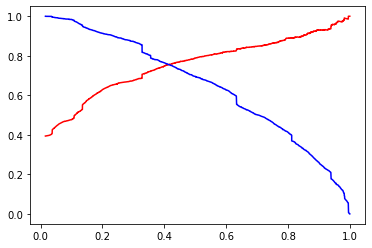

In [102]:
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

**From the above graph, we could make out that the point of optimal cut off is somewhere at 0.4**

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [104]:
# computing accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112108329396945

In [105]:
# establishing a confusion matrix

confus2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confus2

array([[3289,  606],
       [ 593, 1863]], dtype=int64)

In [106]:
# computing the value of true positive
TP = confus2[1,1]

# computing the value of true negatives
TN = confus2[0,0]

# computing the value of false positives
FP = confus2[0,1]

# computing the value of false negatives
FN = confus2[1,0]

In [107]:
# computing precision

TP / (TP + FP)

0.7545565006075334

In [108]:
# computing recall

TP / (TP + FN)

0.7585504885993485

**Precision is currently at 74% and Recall is at around 76% with the current cut off being 0.4**

### X. Prediction on Test Set

In [109]:
# let's store prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# coverting it into the dataframe 'df'
y_pred_df = pd.DataFrame(y_test_pred)

# converting 'y_test' to dataframe
y_test_df = pd.DataFrame(y_test)

# let us now remove index for both dataframes
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# appending 'y_test_df' and 'y_pred_df'
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# renaming the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [110]:
# using the cut off of 0.4 to make a prediction

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0


In [111]:
# computing accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8156445097319134

In [112]:
# establishing a confusion matrix

confus2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confus2

array([[1465,  279],
       [ 223,  756]], dtype=int64)

In [113]:
# computing precision

TP / (TP + FP)

0.7545565006075334

In [114]:
# computing recall

TP / (TP + FN)

0.7585504885993485

**Precision is now at 74% and Recall is at around 76% with the current cut off of 0.4**

## Conclusion:

Looking at the model, it can be concluded that the variables that matter the most in identifying potential leads are: 
Total time spend on the Website.

1. Total number of visits.
2. When the lead source was:
    a. Google
    b. Direct traffic
    c. Organic search
    d. Welingak website
3. When the last activity was SMS sent and Olark Chat Conversation
4. When the lead origin is Lead add format.
5. When their current occupation is as a working professional.

Keeping these in mind the X Education can grow there business as they have a very high chance to getmost of the potential buyers to change their mind and buy their courses.